In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
num_rows = 1000
pressure_columns = ['pressure' + str(i) for i in range(1, 101)]
pressure_values = np.random.randint(0, 4096, size=(num_rows, 100))
df = pd.DataFrame(pressure_values, columns=pressure_columns)
df['total_pressure'] = df.sum(axis=1)
df['sleep'] = np.where(df.index < num_rows // 2, 0, 1)
print(df.head())
df.to_csv('dummy_dataset.csv', index=False)

[1.0, 0.6975, 0.6625, 0.65625, 0.64375, 0.63, 0.59875, 0.59375, 0.565, 0.5475, 0.5375, 0.5475, 0.5325, 0.5175]
[0.455, 0.48, 0.48, 0.445, 0.44, 0.485, 0.455, 0.5, 0.5, 0.51, 0.5, 0.495, 0.52, 0.52]


Text(0, 0.5, 'Accuracy')

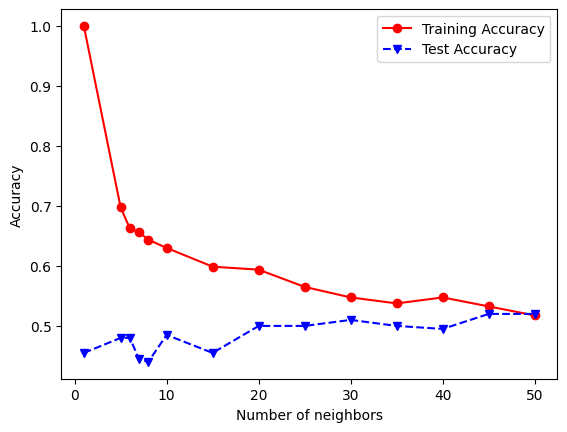

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('dummy_dataset.csv')

X = df.drop(['sleep', 'total_pressure'], axis=1)
y = df['sleep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numNeighbors = [1,5,6,7,8,10,15,20,25,30,35,40,45,50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

print(trainAcc)
print(testAcc)
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import joblib
df = pd.read_csv('dummy_dataset.csv')
X = df.drop(['sleep', 'total_pressure'], axis=1)
y = df['sleep']
clf = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
clf.fit(X, y)
joblib.dump(clf, 'knn_model.pkl')



['knn_model.pkl']

In [7]:
import pandas as pd
import numpy as np
num_points = 3
dummy_data = {}
for i in range(1, 101):
    col_name = f'pressure{i}'
    dummy_data[col_name] = np.random.randint(0, 4096, size=num_points)
df_dummy = pd.DataFrame(dummy_data)
clf_loaded = joblib.load('knn_model.pkl')
predictions = clf_loaded.predict(df_dummy)
print("Predictions for the dummy data:")
for i, pred in enumerate(predictions):
    if pred == 1:
        status = "Awake"
    else:
        status = "Asleep"
    print(f"Data Point {i+1}: Predicted Sleep Status = {status}")

Predictions for the dummy data:
Data Point 1: Predicted Sleep Status = Awake
Data Point 2: Predicted Sleep Status = Asleep
Data Point 3: Predicted Sleep Status = Awake
